In [1]:
import pandas as pd



In [5]:
# Load the Excel file
file_path = "data/HC_1.5.xlsx"  # make sure the file is in the same directory as the notebook
xls = pd.ExcelFile(file_path)



In [6]:
# Check available sheet names
xls.sheet_names


['data', 'rse']

In [7]:
# Load the first sheet
df_raw = xls.parse(xls.sheet_names[0])

# Display some top rows to inspect structure
df_raw.head(10)


,Preliminary data release date: May 2022\nFinal data release date: March 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Table HC1.5 Fuels used and end uses in U.S. h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Number of housing units (million),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Household income,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Total U.S.a,"Less than $5,000","$5,000– $9,999","$10,000– $19,999","$20,000– $39,999","$40,000– $59,999","$60,000– $99,999","$100,000– $149,999","$150,000 or more"
4,All homes,123.53,4.48,4.01,10.25,24.07,19.61,27.71,16.54,16.86
5,Fuels used for any use (more than one may apply),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Electricity,123.53,4.48,4.01,10.25,24.07,19.61,27.71,16.54,16.86
7,Natural gas,75.31,2.51,2.12,5.57,13.42,11.47,16.78,11.11,12.32
8,Propaneb,11.14,0.3,0.32,1.05,2.13,1.63,2.57,1.5,1.63
9,Wood,11.05,0.25,0.19,0.67,1.76,1.67,2.88,1.93,1.71


In [9]:
# Step 1: Set proper headers from row 4 (index 3)
headers = df_raw.iloc[3].tolist()
df = df_raw.iloc[4:].copy()
df.columns = headers


In [10]:
# Step 2: Drop empty rows and columns
df = df.dropna(how='all')
df = df.dropna(axis=1, how='all')

In [11]:
# Step 3: Rename the first column to "Category" (income groups remain as columns)
df.rename(columns={df.columns[0]: "Category"}, inplace=True)

# Step 4: Preview the cleaned data
df.head(10)

,Category,Total U.S.a,"Less than $5,000","$5,000– $9,999","$10,000– $19,999","$20,000– $39,999","$40,000– $59,999","$60,000– $99,999","$100,000– $149,999","$150,000 or more"
4,All homes,123.53,4.48,4.01,10.25,24.07,19.61,27.71,16.54,16.86
5,Fuels used for any use (more than one may apply),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Electricity,123.53,4.48,4.01,10.25,24.07,19.61,27.71,16.54,16.86
7,Natural gas,75.31,2.51,2.12,5.57,13.42,11.47,16.78,11.11,12.32
8,Propaneb,11.14,0.3,0.32,1.05,2.13,1.63,2.57,1.5,1.63
9,Wood,11.05,0.25,0.19,0.67,1.76,1.67,2.88,1.93,1.71
10,Fuel oil or kerosene,5.68,0.11,0.17,0.43,1.04,0.79,1.34,0.85,0.93
11,Electricity end uses (more than one may apply),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Space heating,64.84,2.58,2.31,6.07,13.35,10.47,14.51,8.12,7.44
13,Main,42.57,2.1,1.83,4.38,9.41,7,9.11,4.63,4.11


In [12]:
# Filter fuel rows only
fuels_df = df[df["Category"].isin(["Electricity", "Natural gas", "Wood", "Propane"])].copy()

# Set "Category" as index for better plotting
fuels_df.set_index("Category", inplace=True)

# Transpose so income groups are x-axis
fuels_df = fuels_df.transpose()

# Display structure
fuels_df.head()


Category,Electricity,Natural gas,Wood
Total U.S.a,123.53,75.31,11.05
"Less than $5,000",4.48,2.51,0.25
"$5,000– $9,999",4.01,2.12,0.19
"$10,000– $19,999",10.25,5.57,0.67
"$20,000– $39,999",24.07,13.42,1.76


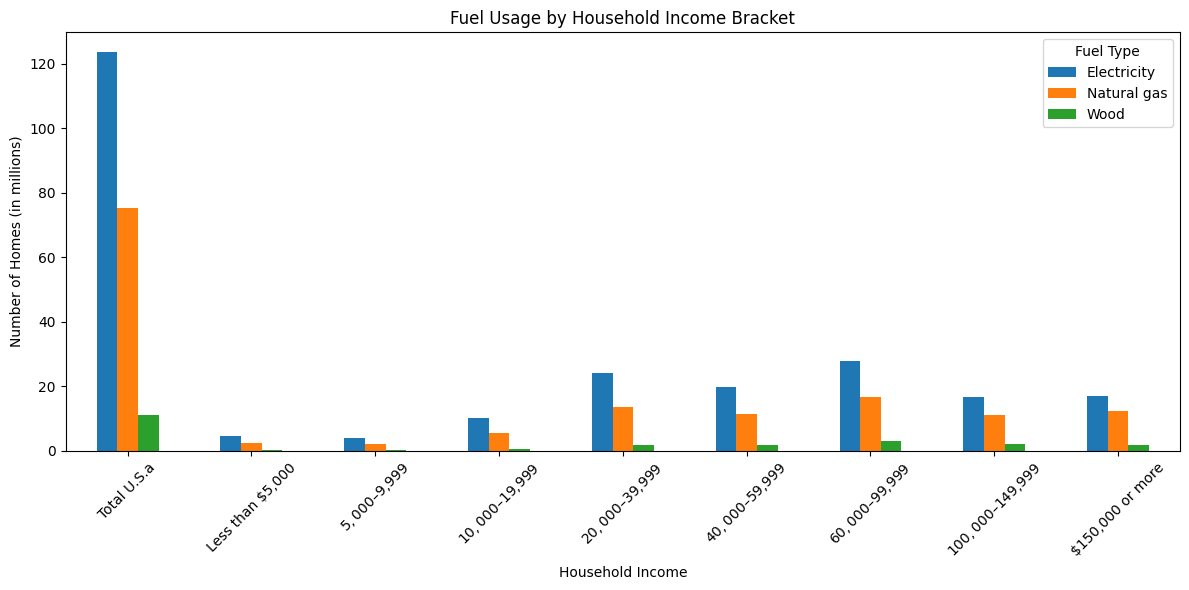

In [14]:
import matplotlib.pyplot as plt

# Plot
fuels_df.plot(kind='bar', figsize=(12,6))
plt.title("Fuel Usage by Household Income Bracket")
plt.xlabel("Household Income")
plt.ylabel("Number of Homes (in millions)")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")
plt.tight_layout()
plt.show()

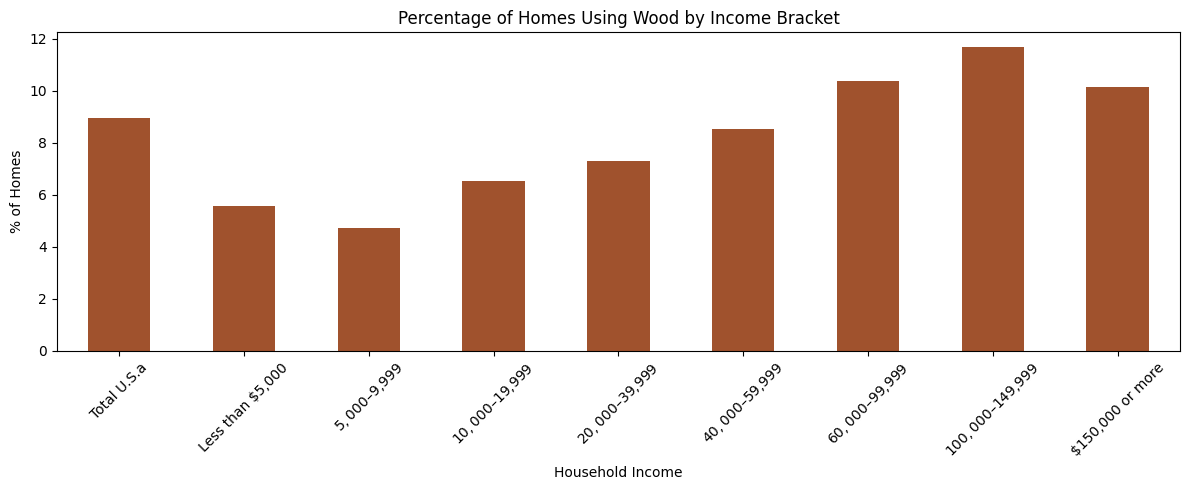

In [15]:
wood = fuels_df["Wood"].astype(float)
total = df[df["Category"] == "All homes"].iloc[0, 1:].astype(float)
wood_percent = (wood / total) * 100

# Plot wood % usage
wood_percent.plot(kind="bar", figsize=(12, 5), color="sienna")
plt.title("Percentage of Homes Using Wood by Income Bracket")
plt.ylabel("% of Homes")
plt.xlabel("Household Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


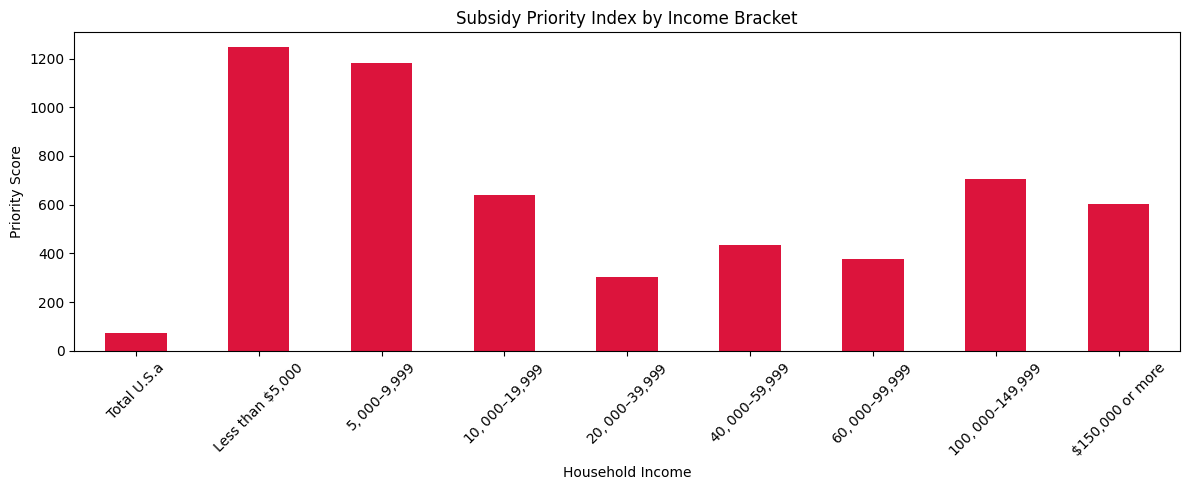

In [16]:
subsidy_priority = wood_percent * (1 / total) * 1000  # inverse of total = gives weight to small populations

subsidy_priority.plot(kind='bar', figsize=(12, 5), color='crimson')
plt.title("Subsidy Priority Index by Income Bracket")
plt.ylabel("Priority Score")
plt.xlabel("Household Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
